# Computerized Control

Machine Learning Algorithms

<h2>K-means Algorithm</h2>

In order to have a first glimpse into the structure of the data we obtained by sampling the current and rpm of the motor, we applied the K-means algorithm. K-means algorithm is a hard clustering algorithm that groups data points in the space by measuring the euclidian distance between each point and a number K of centroids previously determined by a user. The centroids are located randomly in the space and the algorithm runs many iterations, moving the centroids, until a point of convergence is found for all of the clusters, which is when the locations of the centroids does not change from the ones of the previous iteration.
For this analysis, we used the K-means algorithm for each voltage (keeping the voltage as a constant, in a way) and then we made an analysis with all of the samples together in a dataframe.

The code used for this project was based on the one used in this website:
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

For this project, we use the following libraries: pandas for its dataframe data-structure, which allows us to easily manipulate structured data; numpy, which includes functions for data analysis and numpy arrays (more efficient than the Python array). From the library sklearn we imported the cluster and metrics classes. The bottom four lines are mainly for the aesthetics of the graphs

In [1]:
#Importing libraries needed for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

<h3>Individual analysis of the datasets</h3>

In [2]:
#Creating dataframes from the samples obtained with the arduino code
df3 = pd.read_csv('test_3.csv')
df5 = pd.read_csv('test_5.csv')
df7 = pd.read_csv('test_7.csv')
df10 = pd.read_csv('test_10.csv')
df12 = pd.read_csv('test_12.csv')

In [3]:
#Changing the names of the columns of the dataframe
df3 = df3.rename(columns={"8311": "voltage", 'Unnamed: 1': "current", 'Unnamed: 2': "rpm"}) 
df5 = df5.rename(columns={"8311": "voltage", 'Unnamed: 1': "current", 'Unnamed: 2': "rpm"})
df7 = df7.rename(columns={"8311": "voltage", 'Unnamed: 1': "current", 'Unnamed: 2': "rpm"})
df10 = df10.rename(columns={"8311": "voltage", 'Unnamed: 1': "current", 'Unnamed: 2': "rpm"})
df12 = df12.rename(columns={"8311": "voltage", 'Unnamed: 1': "current", 'Unnamed: 2': "rpm"})

#creates a new dataframe from the previous dataframe in order to apply the K-means algorithm
data_kmeans3 = df3[['current', 'rpm']].copy() 
data_kmeans5 = df5[['current', 'rpm']].copy()
data_kmeans7 = df7[['current', 'rpm']].copy()
data_kmeans10 = df10[['current', 'rpm']].copy()
data_kmeans12 = df12[['current', 'rpm']].copy()

In [4]:
#Converting dataframe into numPy array for introducing them in the K-means function
X = np.array(data_kmeans3) 
C = np.array(data_kmeans5)
V = np.array(data_kmeans7)
B = np.array(data_kmeans10)
N = np.array(data_kmeans12)

<h4>3V</h4>

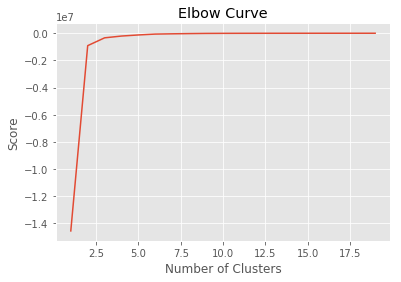

In [5]:
#Getting the number of clusters for the 3V samples

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#The idea behind this step is to look for an 'elbow' in the curve, as this is the best value of k clusters to apply to the data.


[[3.57126556e-01 6.43928019e+02]
 [3.36388889e-01 1.68666667e+01]]


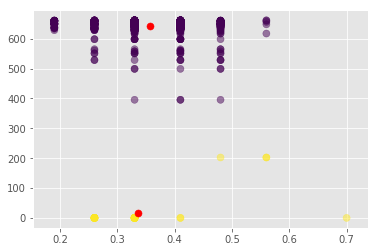

In [8]:
#the KMeans function takes as input the number of cluster we obtained from the previous step. 
#The vector X is introduced (fit) into this function.
kmeans = KMeans(n_clusters=2).fit(X) 
centroids = kmeans.cluster_centers_ #gets the coordinates of the centroids.
print(centroids)
plt.scatter(data_kmeans3['current'], data_kmeans3['rpm'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)#plots the data into a graph and assigns a color for each cluster
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [9]:
cluster_map3 = pd.DataFrame() #initializing a dataframe for the number of cluster
cluster_map3['data_index'] = data_kmeans3.index.values #obtains the indexes of the rows of the original dataframe
cluster_map3['cluster'] = kmeans.labels_ #creates the labels (the number of cluster) for each index

new_column = cluster_map3[['cluster']]

#adding a cluster column, indicating what is the cluster the register belongs to
merged3 = df3.merge(new_column, left_index=True, right_index=True, how='inner') 

#saving the merged3 dataframe to an excel file for further analysis

from pandas import ExcelWriter
writer = ExcelWriter('3v.xlsx')
merged3.to_excel(writer,'Sheet1')
writer.save()

<h4>5V</h4>

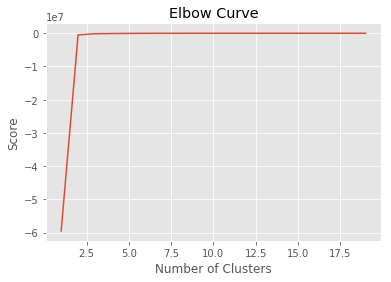

In [22]:
#For this dataset, we can see that the best number of clusters is 2
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(C).score(C) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

[[-6.51260504e-04  1.13630111e+03]
 [ 5.83333333e-03  2.27373675e-13]]


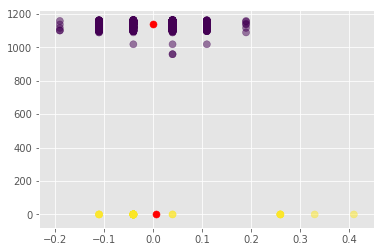

In [23]:
kmeans = KMeans(n_clusters=2).fit(C)  
centroids = kmeans.cluster_centers_ 
print(centroids)
plt.scatter(data_kmeans5['current'], data_kmeans5['rpm'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [25]:
cluster_map5 = pd.DataFrame() #initializing a dataframe for the number of cluster
cluster_map5['data_index'] = data_kmeans5.index.values #obtains the indexes of the rows of the original dataframe
cluster_map5['cluster'] = kmeans.labels_ #creates the labels (the number of cluster) for each index

new_column = cluster_map5[['cluster']]

#adding a cluster column, indicating what is the cluster the register belongs to
merged5 = df5.merge(new_column, left_index=True, right_index=True, how='inner') 

#saving the merged5 dataframe to an excel file for further analysis

from pandas import ExcelWriter
writer = ExcelWriter('5v.xlsx')
merged5.to_excel(writer,'Sheet1')
writer.save()

<h4>7V</h4>

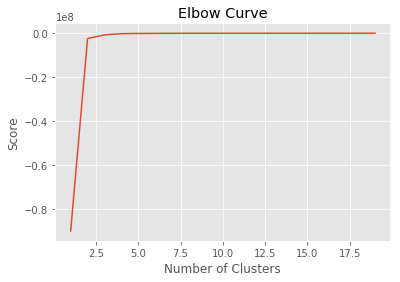

In [26]:
#For this dataset, we can see that the best number of clusters is 2
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(V).score(V) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

[[-1.54388715e-01  1.61276629e+03]
 [-2.38285714e-01 -6.82121026e-13]
 [ 0.00000000e+00  1.15314000e+03]]


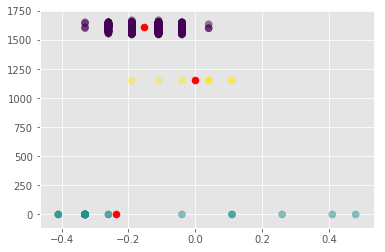

In [27]:
#Afterwards, we decided to use a K=3
kmeans = KMeans(n_clusters=3).fit(V)
centroids = kmeans.cluster_centers_ 
print(centroids)
plt.scatter(data_kmeans7['current'], data_kmeans7['rpm'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)#plots the data into a graph and assigns a color for each cluster
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [28]:
cluster_map7 = pd.DataFrame() #initializing a dataframe for the number of cluster
cluster_map7['data_index'] = data_kmeans7.index.values #obtains the indexes of the rows of the original dataframe
cluster_map7['cluster'] = kmeans.labels_ #creates the labels (the number of cluster) for each index

new_column = cluster_map7[['cluster']]

#adding a cluster column, indicating what is the cluster the register belongs to
merged7 = df7.merge(new_column, left_index=True, right_index=True, how='inner') 

#saving the merged7 dataframe to an excel file for further analysis

from pandas import ExcelWriter
writer = ExcelWriter('7v.xlsx')
merged7.to_excel(writer,'Sheet1')
writer.save()

<h4>10V</h4>

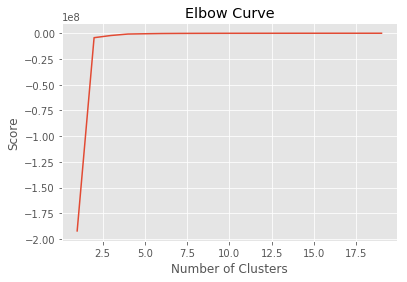

In [29]:
#For this dataset, we can see that the best number of clusters is 2
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(B).score(B) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

[[1.97718191e-01 2.39656511e+03]
 [2.28823529e-01 0.00000000e+00]
 [3.19333333e-01 2.01655333e+03]]


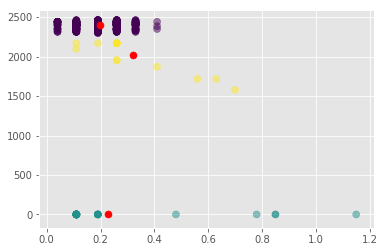

In [31]:
#we decided to use a K = 3
kmeans = KMeans(n_clusters=3).fit(B) 
centroids = kmeans.cluster_centers_ 
print(centroids)
plt.scatter(data_kmeans10['current'], data_kmeans10['rpm'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)#plots the data into a graph and assigns a color for each cluster
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [32]:
cluster_map10 = pd.DataFrame() #initializing a dataframe for the number of cluster
cluster_map10['data_index'] = data_kmeans10.index.values #obtains the indexes of the rows of the original dataframe
cluster_map10['cluster'] = kmeans.labels_ #creates the labels (the number of cluster) for each index

new_column = cluster_map10[['cluster']]

#adding a cluster column, indicating what is the cluster the register belongs to
merged10 = df10.merge(new_column, left_index=True, right_index=True, how='inner') 

#saving the merged10 dataframe to an excel file for further analysis

from pandas import ExcelWriter
writer = ExcelWriter('10v.xlsx')
merged10.to_excel(writer,'Sheet1')
writer.save()

<h4>12V</h4>

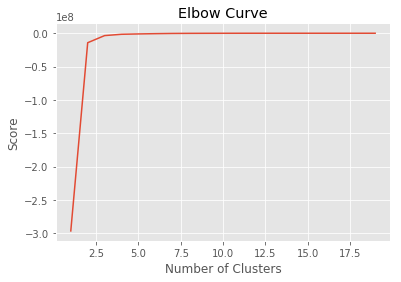

In [33]:
#For this dataset, we can see that the best number of clusters is 2
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(N).score(N) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

[[1.97718191e-01 2.39656511e+03]
 [2.28823529e-01 0.00000000e+00]
 [3.19333333e-01 2.01655333e+03]]


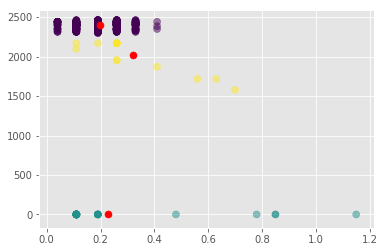

In [34]:
kmeans = KMeans(n_clusters=3).fit(B) #the KMeans function takes as input the number of cluster we obtained from the previous step. The vector X is introduced (fit) into this function.
centroids = kmeans.cluster_centers_ #gets the coordinates of the centroids.
print(centroids)
plt.scatter(data_kmeans10['current'], data_kmeans10['rpm'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)#plots the data into a graph and assigns a color for each cluster
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [35]:
cluster_map12 = pd.DataFrame() #initializing a dataframe for the number of cluster
cluster_map12['data_index'] = data_kmeans12.index.values #obtains the indexes of the rows of the original dataframe
cluster_map12['cluster'] = kmeans.labels_ #creates the labels (the number of cluster) for each index

new_column = cluster_map12[['cluster']]

#adding a cluster column, indicating what is the cluster the register belongs to
merged12 = df12.merge(new_column, left_index=True, right_index=True, how='inner') 

#saving the merged12 dataframe to an excel file for further analysis

from pandas import ExcelWriter
writer = ExcelWriter('12v.xlsx')
merged12.to_excel(writer,'Sheet1')
writer.save()

Conclusions from the constant voltage analysis: for most of the dataframes we obtained values of 2 as K, although for some of them, a K=3 value could be used, as it can be observed from a simple visual analysis of the graphs. We decided to change this value to three in order to have the values in the middle in a different cluster.

From this analysis we can label all of the registers in the samples into three categories: stable state (yellow/upper clusters), transitory state (purple/middle clusters) and noise (green/bottom clusters). This analysis could be applied to new samples and if the register belongs into the bottom cluster, it could be automatically deleted from the dataframe, as they may affect the analysis by being outliers.

<h3>Global K-means</h3>

In [70]:
df3 = pd.read_excel (r'3v.xlsx')
df5 = pd.read_excel (r'5v.xlsx')
df7 = pd.read_excel (r'7v.xlsx')
df10 = pd.read_excel (r'10v.xlsx')
df12 = pd.read_excel (r'12v.xlsx')

#Droping noise from all of the dataframes
df3 = df3.drop(df3[df3.cluster == 1].index)
df5 = df5.drop(df5[df5.cluster == 1].index)
df7 = df7.drop(df7[df7.cluster == 1].index)
df10 = df10.drop(df10[df10.cluster == 1].index)
df12 = df12.drop(df12[df12.cluster == 1].index)

#Joining all of the individual dataframes into a global dataframe

g_kmeans = df3.append(df5, ignore_index = True).append(df7, ignore_index = True).append(df10, ignore_index = True).append(df12, ignore_index = True)
g_kmeans = g_kmeans.drop(['cluster'], axis=1) #the labels are no longer useful

In [46]:
X = np.array(g_kmeans) #converting all the values into a numPy array

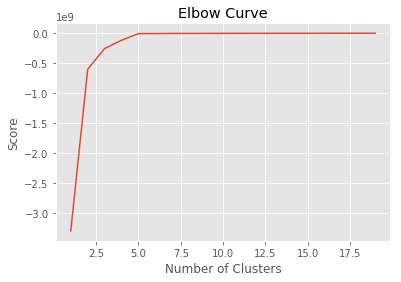

In [52]:
#For this dataframe, we can see that there are three values that produce an 'elbow' in the curve (2, 3 and 5).
#We decided to use 5 as the number of clusters
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<h4>K=5</h4>

In [53]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.00000000e+00  3.57126556e-01  6.43928019e+02]
 [ 1.00082988e+01  2.01172199e-01  2.39505994e+03]
 [ 1.20000000e+01  1.02931794e+00  2.93063515e+03]
 [ 7.05463918e+00 -1.40298969e-01  1.61554111e+03]
 [ 5.03118503e+00  2.66112266e-03  1.13667753e+03]]


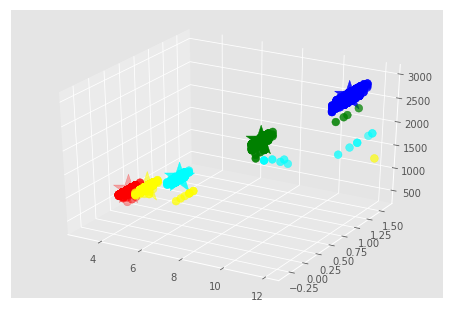

In [54]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['red','green','blue','cyan','yellow'] #assign
asignar=[]
for row in labels:
    asignar.append(colors[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)

In [63]:
cluster_map = pd.DataFrame() #initializing a dataframe for the number of cluster
cluster_map['data_index'] = g_kmeans.index.values #obtains the indexes of the rows of the original dataframe
cluster_map['cluster'] = g_kmeans.labels_ #creates the labels (the number of cluster) for each index

new_column = cluster_map[['cluster']]

#adding a cluster column, indicating what is the cluster the register belongs to
merged = g_kmeans.merge(new_column, left_index=True, right_index=True, how='inner') 

#saving the merged dataframe to an excel file for further analysis

from pandas import ExcelWriter
writer = ExcelWriter('g_cluster.xlsx')
merged.to_excel(writer,'Sheet1')
writer.save()

AttributeError: 'DataFrame' object has no attribute 'labels_'

<h2>Decision Tree</h2>

In [64]:
#Using the code provided by google at this repository: 
#https://github.com/random-forests/tutorials/blob/master/decision_tree.py

import decision_tree as dt

In [65]:
dec_tree = g_kmeans.values

In [66]:
my_tree = dt.build_tree(dec_tree)

In [68]:
dt.classify(dec_tree[1], my_tree)

{395.57: 1,
 499.2: 2,
 528.76: 3,
 558.04: 1,
 565.1: 2,
 551.15: 2,
 598.66: 1,
 633.87: 1,
 623.75: 2,
 649.69: 5,
 648.34: 18,
 617.59: 2,
 643.0: 2,
 656.51: 4,
 660.68: 11,
 640.37: 4,
 651.04: 9,
 647.0: 2,
 632.59: 1,
 659.28: 7,
 655.14: 4,
 636.46: 3,
 641.68: 6,
 657.89: 4,
 628.77: 2}

In [69]:
dt.print_leaf(dt.classify(dec_tree[0], my_tree))

{395.57: '0%',
 499.2: '0%',
 528.76: '0%',
 561.04: '0%',
 558.04: '0%',
 565.1: '0%',
 551.15: '0%',
 598.66: '2%',
 633.87: '0%',
 623.75: '0%',
 647.0: '2%',
 636.46: '4%',
 649.69: '6%',
 648.34: '15%',
 617.59: '0%',
 626.25: '0%',
 653.77: '0%',
 643.0: '0%',
 656.51: '6%',
 659.28: '6%',
 637.76: '4%',
 660.68: '17%',
 640.37: '3%',
 632.59: '5%',
 662.08: '2%',
 652.4: '0%',
 651.04: '4%',
 641.68: '3%',
 655.14: '2%',
 627.51: '0%',
 657.89: '2%',
 628.77: '1%'}